In [216]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [217]:
# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [218]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [219]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split
# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 10000,
train_size = 60000,
random_state = 19) #(5*4-1)

In [220]:
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)


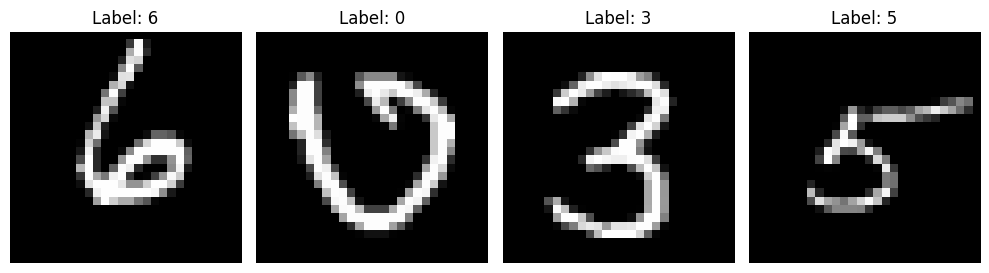

In [221]:
# Выводим 4 изображения
plt.figure(figsize=(10, 3))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()



In [222]:
# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)

Shape of transformed X train: (60000, 784)


In [223]:
# переведем метки в one-hot
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]

Shape of transformed y train: (60000, 10)


In [224]:
from keras.models import Sequential
from keras.layers import Dense

In [225]:
# 1. создаем модель - объявляем ее объектом класса Sequential
model = Sequential()
# 2. добавляем выходной слой(скрытые слои отсутствуют)
model.add(Dense(units=num_classes, activation='softmax'))
# 3. компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [226]:
# вывод информации об архитектуре модели
print(model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [227]:
# Обучаем модель
H = model.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7042 - loss: 1.1653 - val_accuracy: 0.8770 - val_loss: 0.5080
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8784 - loss: 0.4844 - val_accuracy: 0.8907 - val_loss: 0.4209
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8895 - loss: 0.4177 - val_accuracy: 0.8992 - val_loss: 0.3834
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8945 - loss: 0.3846 - val_accuracy: 0.9028 - val_loss: 0.3628
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9008 - loss: 0.3695 - val_accuracy: 0.9048 - val_loss: 0.3491
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9022 - loss: 0.3552 - val_accuracy: 0.9063 - val_loss: 0.3407
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9052 - loss: 0.3446 - val_accuracy: 0.9090 - val_loss: 0.3315
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9069 - loss: 0.3360 - 

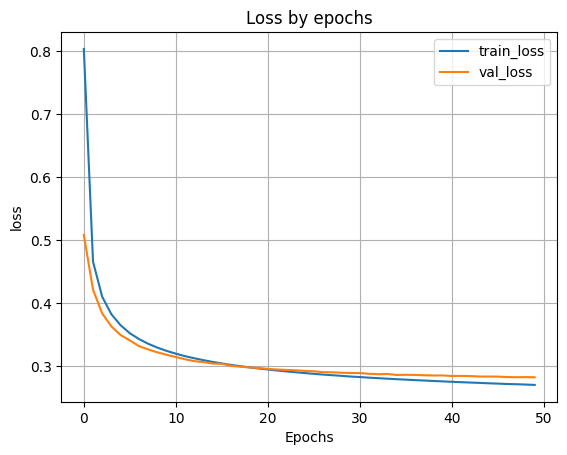

In [228]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [231]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9213 - loss: 0.2825
Loss on test data: 0.28365787863731384
Accuracy on test data: 0.9225000143051147


In [230]:
# сохранение модели на диск
model.save('/content/drive/MyDrive/Colab Notebooks/models/model_zero_hide.keras')

In [236]:
model100 = Sequential()
model100.add(Dense(units=100,input_dim=num_pixels, activation='sigmoid'))
model100.add(Dense(units=num_classes, activation='softmax'))

model100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [250]:
# вывод информации об архитектуре модели
print(model100.summary())

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [251]:
# Обучаем модель
H = model100.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5517 - loss: 1.8718 - val_accuracy: 0.8182 - val_loss: 0.9644
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8306 - loss: 0.8507 - val_accuracy: 0.8643 - val_loss: 0.6192
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8621 - loss: 0.5929 - val_accuracy: 0.8822 - val_loss: 0.4977
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8781 - loss: 0.4907 - val_accuracy: 0.8895 - val_loss: 0.4357
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8836 - loss: 0.4382 - val_accuracy: 0.8958 - val_loss: 0.3980
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8918 - loss: 0.4026 - val_accuracy: 0.8988 - val_loss: 0.3721
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8967 - loss: 0.3788 - val_accuracy: 0.9008 - val_loss: 0.3532
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9012 - loss: 0.3593

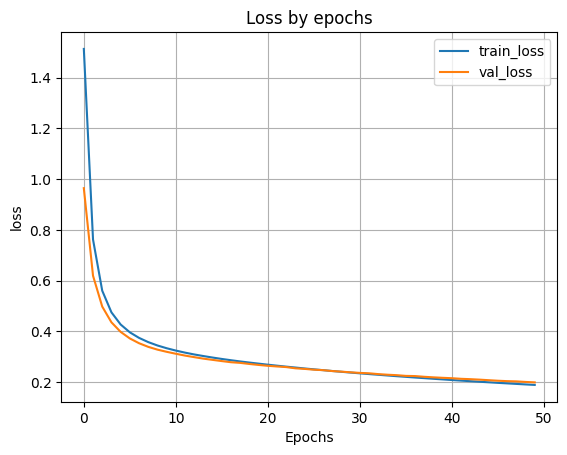

In [252]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [253]:
# Оценка качества работы модели на тестовых данных
scores = model100.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9465 - loss: 0.1946
Loss on test data: 0.19745595753192902
Accuracy on test data: 0.9442999958992004


In [263]:
# сохранение модели на диск
model100.save('/content/drive/MyDrive/Colab Notebooks/models/model100in_1hide.keras')

In [257]:
model300 = Sequential()
model300.add(Dense(units=300,input_dim=num_pixels, activation='sigmoid'))
model300.add(Dense(units=num_classes, activation='softmax'))

model300.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [258]:
# вывод информации об архитектуре модели
print(model300.summary())

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,510 (931.68 KB)

 Trainable params: 238,510 (931.68 KB)

 Non-trainable params: 0 (0.00 B)

None


In [259]:
# Обучаем модель
H = model300.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5545 - loss: 1.7947 - val_accuracy: 0.8370 - val_loss: 0.8455
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8401 - loss: 0.7563 - val_accuracy: 0.8668 - val_loss: 0.5617
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8676 - loss: 0.5395 - val_accuracy: 0.8873 - val_loss: 0.4600
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8786 - loss: 0.4621 - val_accuracy: 0.8970 - val_loss: 0.4114
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8869 - loss: 0.4196 - val_accuracy: 0.8990 - val_loss: 0.3805
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8939 - loss: 0.3848 - val_accuracy: 0.9023 - val_loss: 0.3618
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8952 - loss: 0.3707 - val_accuracy: 0.9038 - val_loss: 0.3471
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9003 - loss: 0.3507 

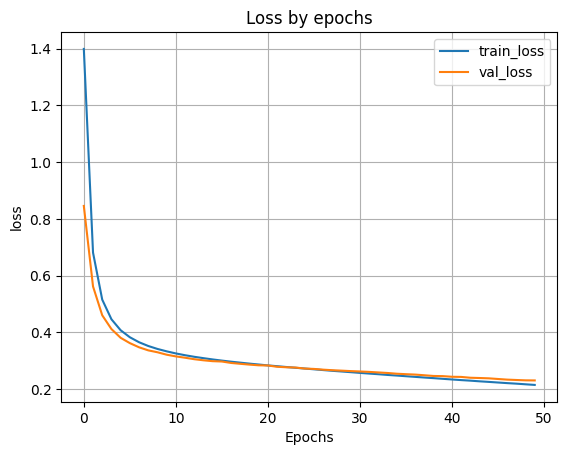

In [260]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [261]:
# Оценка качества работы модели на тестовых данных
scores = model300.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9361 - loss: 0.2237
Loss on test data: 0.22660093009471893
Accuracy on test data: 0.9348000288009644


In [264]:
# сохранение модели на диск
model300.save('/content/drive/MyDrive/Colab Notebooks/models/model300in_1hide.keras')

In [266]:
model500 = Sequential()
model500.add(Dense(units=500,input_dim=num_pixels, activation='sigmoid'))
model500.add(Dense(units=num_classes, activation='softmax'))

model500.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [267]:
# вывод информации об архитектуре модели
print(model500.summary())

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,510 (1.52 MB)

 Trainable params: 397,510 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

None


In [268]:
# Обучаем модель
H = model500.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5639 - loss: 1.7603 - val_accuracy: 0.8423 - val_loss: 0.8077
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8441 - loss: 0.7233 - val_accuracy: 0.8650 - val_loss: 0.5438
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8682 - loss: 0.5227 - val_accuracy: 0.8778 - val_loss: 0.4538
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8836 - loss: 0.4448 - val_accuracy: 0.8933 - val_loss: 0.4062
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8914 - loss: 0.4041 - val_accuracy: 0.8970 - val_loss: 0.3773
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8924 - loss: 0.3856 - val_accuracy: 0.9023 - val_loss: 0.3599
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8965 - loss: 0.3660 - val_accuracy: 0.9017 - val_loss: 0.3462
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8984 - loss: 0

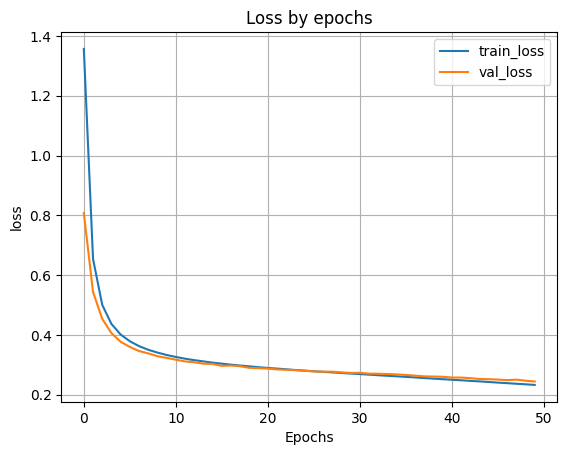

In [269]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [270]:
# Оценка качества работы модели на тестовых данных
scores = model500.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9306 - loss: 0.2398
Loss on test data: 0.24357788264751434
Accuracy on test data: 0.9304999709129333


In [271]:
# сохранение модели на диск
model500.save('/content/drive/MyDrive/Colab Notebooks/models/model500in_1hide.keras')

In [272]:
model10050 = Sequential()
model10050.add(Dense(units=100,input_dim=num_pixels, activation='sigmoid'))
model10050.add(Dense(units=50,activation='sigmoid'))
model10050.add(Dense(units=num_classes, activation='softmax'))

model10050.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [274]:
# вывод информации об архитектуре модели
print(model10050.summary())

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

None


In [275]:
# Обучаем модель
H = model10050.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2384 - loss: 2.2959 - val_accuracy: 0.5560 - val_loss: 2.0638
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5748 - loss: 1.9401 - val_accuracy: 0.7018 - val_loss: 1.4982
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7110 - loss: 1.3739 - val_accuracy: 0.7747 - val_loss: 1.0420
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7843 - loss: 0.9732 - val_accuracy: 0.8223 - val_loss: 0.7836
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8227 - loss: 0.7602 - val_accuracy: 0.8523 - val_loss: 0.6359
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8473 - loss: 0.6283 - val_accuracy: 0.8685 - val_loss: 0.5466
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8634 - loss: 0.5465 - val_accuracy: 0.8808 - val_loss: 0.4867
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8749 - loss: 0.487

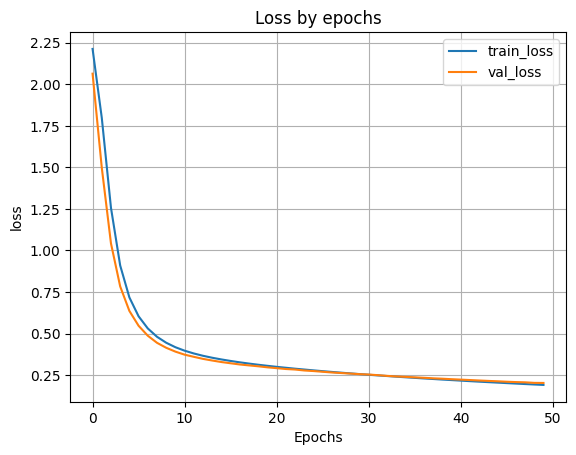

In [276]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [277]:
# Оценка качества работы модели на тестовых данных
scores = model10050.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9439 - loss: 0.1962
Loss on test data: 0.1993969976902008
Accuracy on test data: 0.9438999891281128


In [278]:
# сохранение модели на диск
model10050.save('/content/drive/MyDrive/Colab Notebooks/models/model100in_1hide_50in_2hide.keras')

In [279]:
model100100 = Sequential()
model100100.add(Dense(units=100,input_dim=num_pixels, activation='sigmoid'))
model100100.add(Dense(units=100,activation='sigmoid'))
model100100.add(Dense(units=num_classes, activation='softmax'))

model100100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [280]:
# вывод информации об архитектуре модели
print(model100100.summary())

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [281]:
# Обучаем модель
H = model100100.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 36ms/step - accuracy: 0.2265 - loss: 2.2721 - val_accuracy: 0.5038 - val_loss: 2.0316
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5702 - loss: 1.8881 - val_accuracy: 0.7055 - val_loss: 1.4044
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7132 - loss: 1.2722 - val_accuracy: 0.7908 - val_loss: 0.9573
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7810 - loss: 0.8966 - val_accuracy: 0.8230 - val_loss: 0.7282
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8185 - loss: 0.7008 - val_accuracy: 0.8457 - val_loss: 0.6018
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8417 - loss: 0.5912 - val_accuracy: 0.8690 - val_loss: 0.5242
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8609 - loss: 0.5206 - val_accuracy: 0.8808 - val_loss: 0.4689
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8725 - loss: 0.

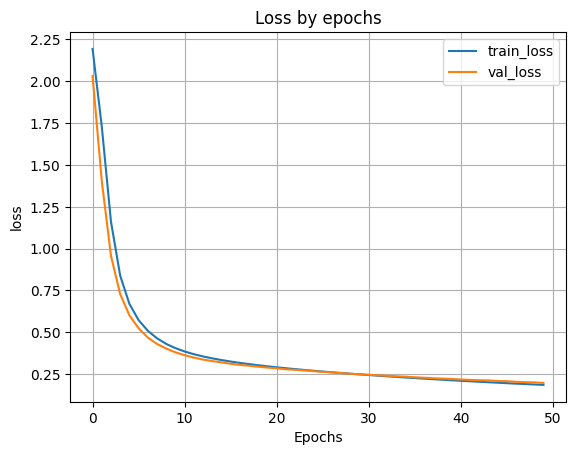

In [282]:
ke

In [283]:
# Оценка качества работы модели на тестовых данных
scores = model100100.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9449 - loss: 0.1931
Loss on test data: 0.19571688771247864
Accuracy on test data: 0.9435999989509583


In [284]:
# сохранение модели на диск
model100100.save('/content/drive/MyDrive/Colab Notebooks/models/model100in_1hide_100in_2hide.keras')

In [285]:
# сохранение лучшей модели в папку best_model
model100.save('/content/drive/MyDrive/Colab Notebooks/best_model/model100.keras')

In [286]:
# Загрузка модели с диска
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/best_model/model100.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
NN output: [[1.1728607e-03 5.4896927e-06 3.3185919e-05 2.6362878e-04 4.8558863e-06
  9.9795568e-01 1.9454242e-07 1.6833146e-05 4.9621973e-04 5.1067746e-05]]


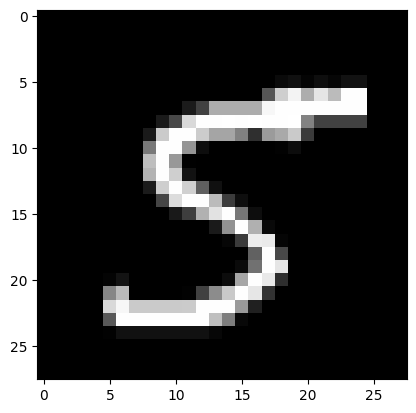

Real mark:  5
NN answer:  5


In [287]:
# вывод тестового изображения и результата распознавания
n = 111
result = model.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
NN output: [[1.02687673e-05 2.02151591e-06 2.86183599e-03 8.74871985e-05
  1.51387369e-02 6.32769879e-05 3.97122385e-05 4.11829986e-02
  1.06158564e-04 9.40507472e-01]]


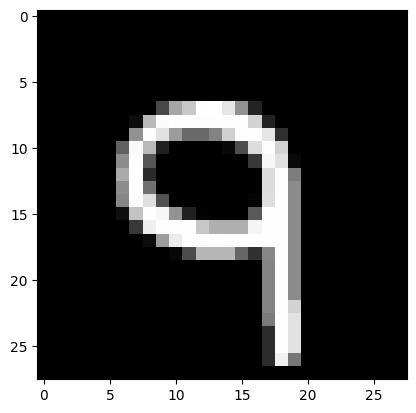

Real mark:  9
NN answer:  9


In [288]:
# вывод тестового изображения и результата распознавания
n = 222
result = model.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))

In [289]:
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('test.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

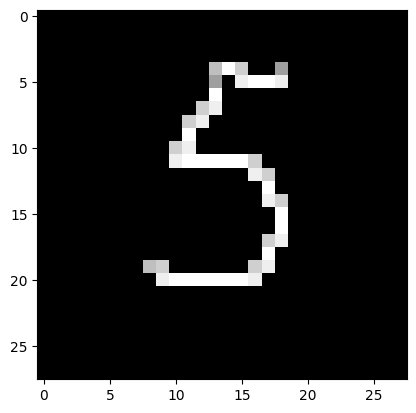

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
I think it's  5


In [290]:
# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model.predict(test_img)
print('I think it\'s ', np.argmax(result))

In [292]:
# загрузка собственного изображения
from PIL import Image
file2_data = Image.open('test_2.png')
file2_data = file2_data.convert('L') # перевод в градации серого
test2_img = np.array(file2_data)

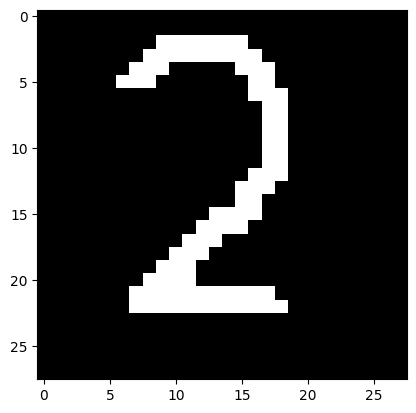

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
I think it's  2


In [293]:
# вывод собственного изображения
plt.imshow(test2_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test2_img = test2_img / 255
test2_img = test2_img.reshape(1, num_pixels)
# распознавание
result_2 = model.predict(test2_img)
print('I think it\'s ', np.argmax(result_2))

In [294]:
# загрузка собственного изображения, повернутого на 90 градусов
from PIL import Image
file90_data = Image.open('test90.png')
file90_data = file90_data.convert('L') # перевод в градации серого
test90_img = np.array(file90_data)

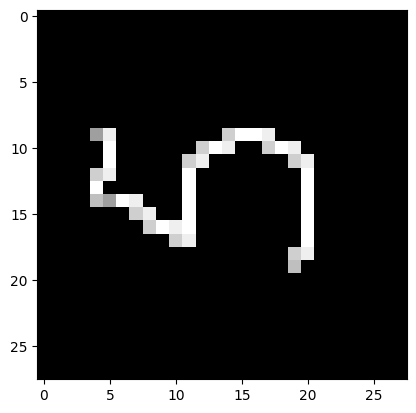

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
I think it's  7


In [295]:
# вывод собственного изображения
plt.imshow(test90_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test90_img = test90_img / 255
test90_img = test90_img.reshape(1, num_pixels)
# распознавание
result_3 = model.predict(test90_img)
print('I think it\'s ', np.argmax(result_3))

In [297]:
# загрузка собственного изображения, повернутого на 90 градусов
from PIL import Image
file902_data = Image.open('test90_2.png')
file902_data = file902_data.convert('L') # перевод в градации серого
test902_img = np.array(file902_data)

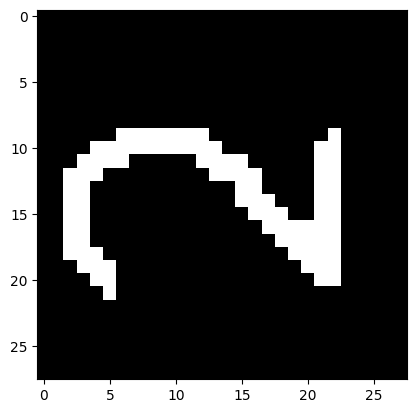

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
I think it's  7


In [298]:
# вывод собственного изображения
plt.imshow(test902_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test902_img = test902_img / 255
test902_img = test902_img.reshape(1, num_pixels)
# распознавание
result_4 = model.predict(test902_img)
print('I think it\'s ', np.argmax(result_4))